在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [83]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [84]:
#####################################
#                 1                 #
#####################################

## 从 daily_engagement.csv 和 project_submissions.csv 载入数据并存
## 储至下面的变量中，然后检查每张表的第1行。
enrollments_filename = '\Users\Ming\P4\data/enrollments.csv'
daily_engagement = '\Users\Ming\P4\data/daily-engagement.csv'
project_submissions = '\Users\Ming\P4\data/project-submissions.csv'

In [85]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        enrollments = list(reader)
        return enrollments

In [86]:
enrollments =  read_csv(enrollments_filename)

In [87]:
daily_engagement =  read_csv(daily_engagement)

In [88]:
project_submissions =  read_csv(project_submissions)

## 修正数据类型

In [89]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [90]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [91]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [92]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [93]:
#####################################
#                 2                 #
#####################################

## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量
len(enrollments)

unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)


1302

In [102]:
len(daily_engagement)
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

KeyError: 'account_key'

In [103]:
len(project_submissions)
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

## 数据中的问题

In [104]:
#####################################
#                 3                 #
#####################################

## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [105]:
print daily_engagement[100]

{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 4, 19, 0, 0)}


## 缺失的互动（Engagement）记录

In [106]:
#####################################
#                 4                 #
#####################################

## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

NameError: name 'unique_engagement_students' is not defined

## 检查更多的问题记录

In [107]:
#####################################
#                 5                 #
#####################################

## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1

num_problem_students

NameError: name 'unique_engagement_students' is not defined

## 追踪剩余的问题

In [108]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [109]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [110]:
# 从3张表中移除所有 Udacity 的测试帐号
#完成了第一个项目的学员数据
non_udacity_enrollments = remove_udacity_accounts(enrollments)
#日常参与学习数据
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
#每个学生提交数据分析纳米学位项目的数据
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## 重新定义问题

In [137]:
#####################################
#                 6                 #
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。
paid_students = {}
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] == None or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        join_date = enrollment['join_date']
        #为了提出注册多次的学生
        if account_key not in paid_students or \
                join_date > paid_students[account_key]: #最近一次的注册日期
            paid_students[account_key] = join_date
print len(paid_students)


995


## 获取第1周的数据
获取第1周的数据

In [138]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0 

In [139]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

def remove_free_trial_cancels(data):
    new_date = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_date.append(data_point)
    return new_date

# print len(non_udacity_enrollments)
# print len(non_udacity_engagement)
# print len(non_udacity_submissions)

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [140]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [141]:
paid_engagement_in_first_week = []

for engagement_student in paid_engagement:
    account_key = engagement_student['account_key']
    record_date = engagement_student['utc_date']
    join_date = paid_students[account_key]
    if within_one_week(join_date, record_date):
        paid_engagement_in_first_week.append(engagement_student)

    #付费的，一周内有学习的学生
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [116]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

#如果 engagement_by_account 没有就返回空列表
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    #defaultdict类的初始化函数接受一个类型作为参数，当所访问的键不存在的时候，可以实例化一个值作为默认值
    engagement_by_account[account_key].append(engagement_record)


In [117]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [118]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)



Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## 纠错现有的数据分析代码

In [119]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。
for k,v in total_minutes_by_account.items():
    if v > 10568:
        print k 
print engagement_by_account[u'108']

[{u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 25.9137858334, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 20, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 3.40682316667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 21, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 99.1186611667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 22, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 35.8316206667, u'projects_completed': 2, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 23, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'10

## 第1周完成的课程数（Lessons）

In [120]:
#####################################
#                 9                 #
#####################################
## 修改之前的代码，找出第1周学生完成课程数u'lessons_completed的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码

from collections import defaultdict

def group_date(data, key_name):
    # 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表
    #如果 engagement_by_account 没有就返回空列表
    group_date = defaultdict(list)
    for engagement_record in data:
        account_key = engagement_record[key_name]
        #defaultdict类的初始化函数接受一个类型作为参数，当所访问的键不存在的时候，可以实例化一个值作为默认值
        group_date[account_key].append(engagement_record)
    return group_date

engagement_by_account = group_date(paid_engagement_in_first_week, 'account_key')


In [121]:
import numpy as np

def sum_grouped_items(group_data, field_name):
    total_by_account = {}
    for account_key, engagement_for_student in group_data.items():
        total = 0
        for engagement_record in engagement_for_student:
            total += engagement_record[field_name]
        total_by_account[account_key] = total
    return total_by_account

#num_courses_visited
lessons_completed = sum_grouped_items(engagement_by_account, 'lessons_completed')
print lessons_completed
# print num_courses_visited

{u'619': 6, u'1140': 1, u'669': 0, u'428': 2, u'344': 4, u'0': 1, u'346': 1, u'347': 3, u'340': 1, u'341': 0, u'342': 0, u'343': 0, u'811': 9, u'812': 20, u'348': 0, u'349': 1, u'816': 0, u'918': 0, u'1149': 3, u'719': 0, u'718': 0, u'715': 1, u'426': 0, u'713': 0, u'712': 0, u'710': 0, u'661': 0, u'129': 1, u'660': 0, u'422': 2, u'1060': 1, u'1062': 0, u'1067': 0, u'1066': 0, u'671': 0, u'427': 3, u'298': 1, u'299': 0, u'296': 0, u'297': 2, u'294': 2, u'295': 2, u'292': 0, u'293': 4, u'290': 3, u'291': 0, u'591': 0, u'590': 0, u'593': 0, u'592': 1, u'595': 2, u'594': 0, u'597': 6, u'596': 4, u'195': 4, u'194': 1, u'197': 9, u'196': 1, u'191': 0, u'190': 0, u'193': 0, u'192': 4, u'270': 9, u'271': 5, u'272': 8, u'273': 0, u'274': 6, u'275': 0, u'276': 3, u'277': 2, u'278': 0, u'279': 0, u'497': 1, u'524': 0, u'525': 0, u'526': 18, u'527': 0, u'520': 0, u'1019': 0, u'522': 0, u'523': 0, u'1014': 10, u'1015': 0, u'528': 3, u'529': 0, u'1013': 0, u'1235': 1, u'449': 0, u'391': 0, u'1231':

In [146]:
import numpy as np

def count_data(arg):
    name = arg.values()
    
    print 'Mean:', np.mean(name)
    print 'Standard deviation:', np.std(name)
    print 'Minimum:', np.min(name)
    print 'Maximum:', np.max(name)

count_data(lessons_completed)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## 第1周的访问次数

In [123]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。

sum_has_visited = sum_grouped_items(engagement_by_account, 'has_visited')


In [124]:
import numpy as np

def count_data(arg):
    name = arg.values()
    print 'Mean:', np.mean(name)
    print 'Standard deviation:', np.std(name)
    print 'Minimum:', np.min(name)
    print 'Maximum:', np.max(name)

count_data(sum_has_visited)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## 区分项目通过的学生

In [125]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。





In [143]:
# paid_engagement_in_first_week = []

# for engagement_student in paid_engagement:
#     account_key = engagement_student['account_key']
#     record_date = engagement_student['utc_date']
#     join_date = paid_students[account_key]
#     if within_one_week(join_date, record_date):
#         paid_engagement_in_first_week.append(engagement_student)

#     #付费的，一周内有学习的学生
# len(paid_engagement_in_first_week)
#paid_submissions
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()
for submission in paid_submissions:
    project = submission['lesson_key']
    assigned_rating = submission['assigned_rating']
    if (assigned_rating == 'PASSED'or assigned_rating == 'DISTINCTION ' )and \
            project in subway_project_lesson_keys:
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)      


637

In [142]:
#paid_engagement_in_first_week 付费的第一周学生学习情况
passing_engagement = []
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4457
2462


## 对比两组学生数据

In [150]:
import matplotlib.pyplot as plt
import numpy as np

def count_data(arg):
    name = arg.values()
    %matplotlib inline
    plt.hist(name)
    print 'Mean:', np.mean(name)
    print 'Standard deviation:', np.std(name)
    print 'Minimum:', np.min(name)
    print 'Maximum:', np.max(name)

Mean: 393.386172311
Standard deviation: 449.204283129
Minimum: 0.0
Maximum: 3564.7332645


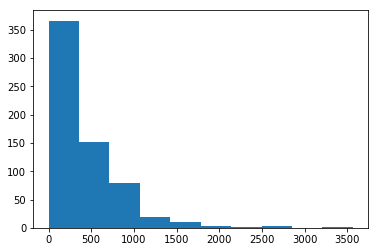

In [152]:
######################################
#                 12                 #
######################################

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。
#访问时间
passing_group =  group_date(passing_engagement, 'account_key')
non_passing_group =  group_date(non_passing_engagement, 'account_key')
sum_grouped_items_passing = sum_grouped_items(passing_group, 'total_minutes_visited')
sum_grouped_items_non_passing = sum_grouped_items(non_passing_group, 'total_minutes_visited')
count_data_passing = count_data(sum_grouped_items_passing)


Mean: 152.479869715
Standard deviation: 279.042488894
Minimum: 0.0
Maximum: 1768.52274933


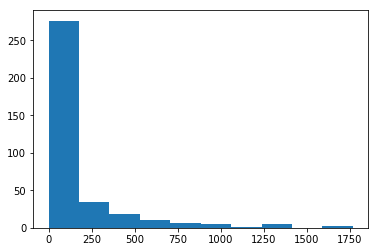

In [153]:
count_data_non_passing = count_data(sum_grouped_items_non_passing)

Mean: 2.05337519623
Standard deviation: 3.15237949133
Minimum: 0
Maximum: 36


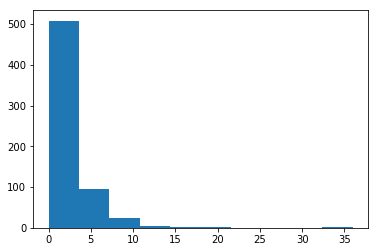

In [154]:
#课程完成数
sum_grouped_items_passing = sum_grouped_items(passing_group, 'lessons_completed')
sum_grouped_items_non_passing = sum_grouped_items(non_passing_group, 'lessons_completed')
count_data_passing = count_data(sum_grouped_items_passing)


Mean: 0.893854748603
Standard deviation: 2.55222899647
Minimum: 0
Maximum: 27


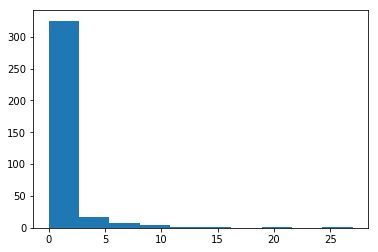

In [155]:
count_data_non_passing = count_data(sum_grouped_items_non_passing)

Mean: 3.37990580848
Standard deviation: 2.25531390442
Minimum: 0
Maximum: 7


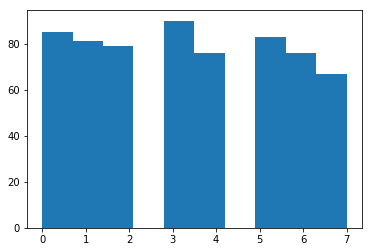

In [156]:
#访问天数
sum_grouped_items_passing = sum_grouped_items(passing_group, 'has_visited')
sum_grouped_items_non_passing = sum_grouped_items(non_passing_group, 'has_visited')
count_data_passing = count_data(sum_grouped_items_passing)


Mean: 1.95530726257
Standard deviation: 1.94569063739
Minimum: 0
Maximum: 7


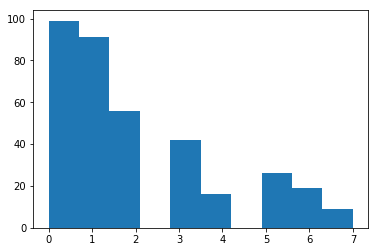

In [157]:
count_data_non_passing = count_data(sum_grouped_items_non_passing)

## 制作直方图

Mean: 1.95530726257
Standard deviation: 1.94569063739
Minimum: 0
Maximum: 7


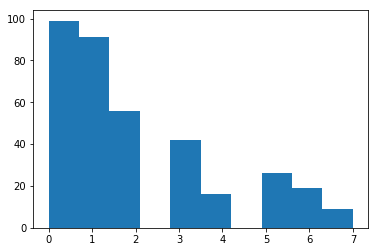

In [149]:
######################################
#                 13                 #
######################################

## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。

    


# count_data_passing = count_data(sum_grouped_items_passing)
count_data_non_passing = count_data(sum_grouped_items_non_passing)

## 改进图表及分享发现

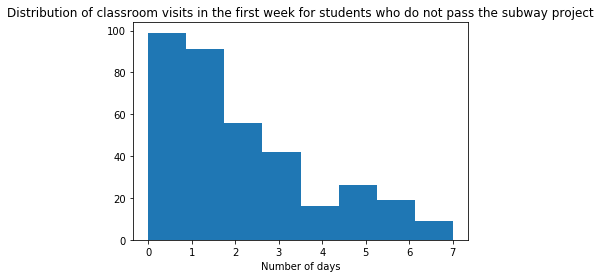

In [161]:
######################################
#                 14                 #
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。
import seaborn as sns

plt.hist(sum_grouped_items_non_passing.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')



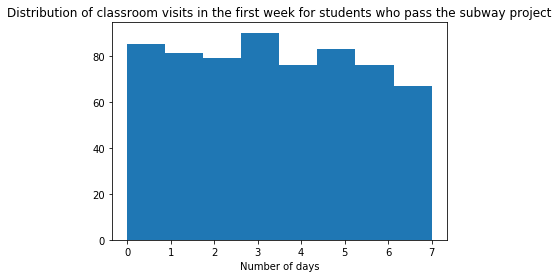

In [162]:
plt.hist(sum_grouped_items_passing.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')